In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine,text
import urllib.parse

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [58]:
housing_data_df= pd.read_csv("F:/Python_WC/Luxury Housing Sales Analysis – Bengaluru/Luxury_Housing_Bangalore/Luxury_Housing_Bangalore.csv")


In [59]:
housing_data_df

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4bhk,12.750846039118798,Primary,NRI,31-03-2025,7.990091,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3Bhk,16.292151871065954,Primary,Other,30-06-2024,4.839024,NaN,Under construction,NRI Desk,no,7.723898,106,NaN
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4bhk,10.517724412961911,Primary,HNI,31-12-2023,8.131315,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.
3,PROP000004,bellary road,Project_3,Embassy,6192.0,3BHK,9.396367494232896,Primary,HNI,31-03-2024,7.501657,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!
4,PROP000005,Koramangala,Project_4,SNN Raj,7147.0,4Bhk,15.345392444511946,Secondary,HNI,31-12-2024,4.525216,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100995,PROP004730,BELLARY ROAD,Project_229,Embassy,8546.0,5Bhk+,11.33081004147843,Secondary,CXO,31-12-2024,8.552797,6.221131,Under construction,NRI Desk,no,7.511827,22,Will buy after possession.
100996,PROP059810,Bellary Road,Project_309,Brigade,3408.0,3bhk,10.829373158307602,Primary,CXO,30-09-2024,6.879269,9.783611,Ready to move,Direct,no,9.851849,26,Agent was not responsive.
100997,PROP065099,HENNUR ROAD,Project_98,RMZ,4691.0,4BHK,11.183303152058548,Primary,NRI,31-12-2023,6.753812,8.383013,Under construction,Broker,no,9.101604,44,Loved the amenities!
100998,PROP093022,rajajinagar,Project_21,Embassy,7435.0,3BHK,10.914156376035923,Secondary,Other,30-06-2024,4.437787,5.756247,Under construction,Broker,yes,8.588551,66,Excellent location!


In [60]:
housing_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Property_ID           101000 non-null  object 
 1   Micro_Market          101000 non-null  object 
 2   Project_Name          101000 non-null  object 
 3   Developer_Name        101000 non-null  object 
 4   Unit_Size_Sqft        90954 non-null   float64
 5   Configuration         101000 non-null  object 
 6   Ticket_Price_Cr       90981 non-null   object 
 7   Transaction_Type      101000 non-null  object 
 8   Buyer_Type            101000 non-null  object 
 9   Purchase_Quarter      101000 non-null  object 
 10  Connectivity_Score    101000 non-null  float64
 11  Amenity_Score         90910 non-null   float64
 12  Possession_Status     101000 non-null  object 
 13  Sales_Channel         101000 non-null  object 
 14  NRI_Buyer             101000 non-null  object 
 15  

In [61]:
housing_data_df.head()

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4bhk,12.750846039118798,Primary,NRI,31-03-2025,7.990091,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3Bhk,16.292151871065954,Primary,Other,30-06-2024,4.839024,NaN,Under construction,NRI Desk,no,7.723898,106,NaN
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4bhk,10.517724412961911,Primary,HNI,31-12-2023,8.131315,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.
3,PROP000004,bellary road,Project_3,Embassy,6192.0,3BHK,9.396367494232896,Primary,HNI,31-03-2024,7.501657,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!
4,PROP000005,Koramangala,Project_4,SNN Raj,7147.0,4Bhk,15.345392444511946,Secondary,HNI,31-12-2024,4.525216,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.


In [62]:
housing_data_df.tail()

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
100995,PROP004730,BELLARY ROAD,Project_229,Embassy,8546.0,5Bhk+,11.33081004147843,Secondary,CXO,31-12-2024,8.552797,6.221131,Under construction,NRI Desk,no,7.511827,22,Will buy after possession.
100996,PROP059810,Bellary Road,Project_309,Brigade,3408.0,3bhk,10.829373158307602,Primary,CXO,30-09-2024,6.879269,9.783611,Ready to move,Direct,no,9.851849,26,Agent was not responsive.
100997,PROP065099,HENNUR ROAD,Project_98,RMZ,4691.0,4BHK,11.183303152058548,Primary,NRI,31-12-2023,6.753812,8.383013,Under construction,Broker,no,9.101604,44,Loved the amenities!
100998,PROP093022,rajajinagar,Project_21,Embassy,7435.0,3BHK,10.914156376035923,Secondary,Other,30-06-2024,4.437787,5.756247,Under construction,Broker,yes,8.588551,66,Excellent location!
100999,PROP023826,whitefield,Project_325,L&T Realty,3218.0,4bhk,₹13.27 Cr,Primary,Startup Founder,31-12-2023,7.760416,9.989290,Under construction,Direct,yes,9.917647,58,Loved the amenities!


In [63]:
housing_data_df.columns

Index(['Property_ID', 'Micro_Market', 'Project_Name', 'Developer_Name',
       'Unit_Size_Sqft', 'Configuration', 'Ticket_Price_Cr',
       'Transaction_Type', 'Buyer_Type', 'Purchase_Quarter',
       'Connectivity_Score', 'Amenity_Score', 'Possession_Status',
       'Sales_Channel', 'NRI_Buyer', 'Locality_Infra_Score',
       'Avg_Traffic_Time_Min', 'Buyer_Comments'],
      dtype='object')

In [64]:
housing_data_df.shape

(101000, 18)

In [65]:
housing_data_df.describe()

,Unit_Size_Sqft,Connectivity_Score,Amenity_Score,Locality_Infra_Score,Avg_Traffic_Time_Min
count,90954.000000,101000.000000,90910.000000,101000.000000,101000.000000
mean,5972.274765,6.992619,7.503663,7.498426,67.182921
std,1783.397836,1.731757,1.440758,1.443128,30.271611
min,-1.000000,4.000031,5.000224,5.000013,15.000000
25%,4477.250000,5.494526,6.260329,6.247954,41.000000
50%,5990.000000,6.985805,7.499123,7.495614,67.000000
75%,7497.000000,8.490000,8.752207,8.749824,93.000000
max,8999.000000,9.999970,9.999865,9.999956,119.000000


In [66]:
housing_data_df.isnull().sum().sort_values(ascending=False)

Buyer_Comments          18287
Amenity_Score           10090
Unit_Size_Sqft          10046
Ticket_Price_Cr         10019
Micro_Market                0
Property_ID                 0
Configuration               0
Transaction_Type            0
Developer_Name              0
Project_Name                0
Purchase_Quarter            0
Buyer_Type                  0
Possession_Status           0
Connectivity_Score          0
Sales_Channel               0
NRI_Buyer                   0
Locality_Infra_Score        0
Avg_Traffic_Time_Min        0
dtype: int64

In [67]:
# Check for duplicate rows
housing_data_df.duplicated().sum()


np.int64(1000)

In [68]:
housing_data_df.drop_duplicates(inplace=True)

In [69]:
housing_data_df.sample(10) # Randomly sample 10 rows from df for inspection

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
39674,PROP039675,KORAMANGALA,Project_174,Sobha,6201.0,4bhk,14.739023379905696,Primary,NRI,31-03-2025,4.612812,7.861059,Launch,Broker,no,7.373701,104,Connectivity is poor.
34074,PROP034075,YELAHANKA,Project_74,RMZ,NaN,3Bhk,11.895595340277872,Secondary,NRI,30-06-2024,7.462366,9.083036,Ready to move,Direct,yes,5.991050,69,NaN
15986,PROP015987,DOMLUR,Project_486,Tata Housing,7408.0,3Bhk,12.781246196798053,Secondary,CXO,30-06-2024,8.601421,8.761837,Launch,Direct,yes,8.178230,105,Loved the amenities!
61913,PROP061914,Jayanagar,Project_413,Tata Housing,8447.0,3BHK,NaN,Primary,NRI,30-06-2024,4.236577,NaN,Launch,Broker,yes,9.808718,50,NaN
54544,PROP054545,BANNERGHATTA ROAD,Project_44,Tata Housing,5185.0,5BHK+,₹9.16 Cr,Secondary,Other,30-06-2024,8.285875,5.199801,Ready to move,Broker,yes,7.989993,39,Great value for money.
31791,PROP031792,domlur,Project_291,Embassy,7388.0,5Bhk+,14.56105534688378,Primary,Startup Founder,30-06-2024,5.295519,7.701430,Under construction,Online,no,6.988974,49,Connectivity is poor.
34412,PROP034413,hennur road,Project_412,Sobha,8163.0,3BHK,₹11.14 Cr,Secondary,NRI,31-03-2024,4.407960,5.816029,Ready to move,Direct,no,7.021467,68,Underpriced for location.
74351,PROP074352,whitefield,Project_351,Sobha,6728.0,4BHK,13.021876851493856,Secondary,Other,30-06-2023,7.540870,8.433292,Under construction,Direct,no,7.335863,32,Excellent location!
88202,PROP088203,ELECTRONIC CITY,Project_202,RMZ,5553.0,3BHK,8.705214056290792,Primary,NRI,31-12-2024,9.707898,6.800206,Launch,NRI Desk,yes,7.641966,99,NaN
43059,PROP043060,Jp Nagar,Project_59,Total Environment,3014.0,4BHK,₹10.51 Cr,Secondary,Startup Founder,30-06-2023,9.746705,7.623260,Under construction,NRI Desk,yes,7.716255,46,Too far from my office.


# clean inconsistent formats

In [70]:
housing_data_df['Ticket_Price_Cr']=housing_data_df['Ticket_Price_Cr'].str.replace('Cr','',regex=False).str.strip().str.replace('Rs','').str.replace('₹','').str.replace(',', '', regex=False).str.strip()
# Clean the 'Ticket_Price_Cr' column by removing unwanted characters like 'Cr', 'Rs', and '₹', and then strip extra spaces
housing_data_df['Ticket_Price_Cr']=pd.to_numeric(housing_data_df['Ticket_Price_Cr'],errors='coerce')
# Convert the cleaned 'Ticket_Price_Cr' column to numeric values; invalid parsing will be set as NaN


In [71]:
housing_data_df['Ticket_Price_Cr'] # Display the cleaned and converted 'Ticket_Price_Cr' column to verify the changes

0        12.750846
1        16.292152
2        10.517724
3         9.396367
4        15.345392
           ...    
99995    10.185193
99996    12.272081
99997    13.730179
99998    10.363989
99999    10.415617
Name: Ticket_Price_Cr, Length: 100000, dtype: float64

Data Cleaning 

Filling Null Values

In [72]:
housing_data_df["Unit_Size_Sqft"].head(20)

0     4025.0
1     5760.0
2     7707.0
3     6192.0
4     7147.0
5     4290.0
6     6776.0
7     5763.0
8     5815.0
9     8675.0
10    8872.0
11    8765.0
12    4606.0
13    5157.0
14    6463.0
15    4814.0
16    3369.0
17       NaN
18       NaN
19    7324.0
Name: Unit_Size_Sqft, dtype: float64

In [73]:
housing_data_df["Unit_Size_Sqft"].tail(20)

99980    4363.0
99981    5301.0
99982    3232.0
99983    4567.0
99984    8021.0
99985    7984.0
99986    5993.0
99987    3356.0
99988    6070.0
99989    5261.0
99990    3968.0
99991    6339.0
99992    6831.0
99993    7902.0
99994    7300.0
99995    5550.0
99996    3171.0
99997    5599.0
99998    7342.0
99999    5016.0
Name: Unit_Size_Sqft, dtype: float64

In [74]:
#housing_data_df[housing_data_df["Unit_Size_Sqft"].isnull()]
housing_data_df["Unit_Size_Sqft"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: Unit_Size_Sqft, Length: 100000, dtype: bool

In [75]:

# Fill missing values in 'Unit_Size_Sqft' with the mean of the column
housing_data_df["Unit_Size_Sqft"].fillna(housing_data_df["Unit_Size_Sqft"].mean(), inplace=True)


In [77]:
housing_data_df["Unit_Size_Sqft"].isnull().sum()

np.int64(0)

In [78]:
housing_data_df['Ticket_Price_Cr'].fillna(housing_data_df['Ticket_Price_Cr'].mean(), inplace=True)
# Fill missing values in 'Ticket_Price_Cr' with the mean of the column

In [79]:
housing_data_df["Amenity_Score"] = housing_data_df["Amenity_Score"].fillna(housing_data_df["Amenity_Score"].median())
# Fill missing values in 'Amenity_Score' with the median of the column

In [80]:
housing_data_df['Buyer_Comments'] = housing_data_df['Buyer_Comments'].fillna("No Comments")
# Fill missing values in 'Buyer_Comments' with the placeholder text "No Comments"

In [81]:
housing_data_df.isnull().sum()

Property_ID             0
Micro_Market            0
Project_Name            0
Developer_Name          0
Unit_Size_Sqft          0
Configuration           0
Ticket_Price_Cr         0
Transaction_Type        0
Buyer_Type              0
Purchase_Quarter        0
Connectivity_Score      0
Amenity_Score           0
Possession_Status       0
Sales_Channel           0
NRI_Buyer               0
Locality_Infra_Score    0
Avg_Traffic_Time_Min    0
Buyer_Comments          0
dtype: int64

In [82]:
housing_data_df.dtypes

Property_ID              object
Micro_Market             object
Project_Name             object
Developer_Name           object
Unit_Size_Sqft          float64
Configuration            object
Ticket_Price_Cr         float64
Transaction_Type         object
Buyer_Type               object
Purchase_Quarter         object
Connectivity_Score      float64
Amenity_Score           float64
Possession_Status        object
Sales_Channel            object
NRI_Buyer                object
Locality_Infra_Score    float64
Avg_Traffic_Time_Min      int64
Buyer_Comments           object
dtype: object

In [83]:
housing_data_df["Micro_Market"].unique()

array(['Sarjapur Road', 'Indiranagar', 'Bannerghatta Road',
       'bellary road', 'Koramangala', 'YELAHANKA', 'whitefield',
       'sarjapur road', 'JP NAGAR', 'Rajajinagar', 'koramangala',
       'WHITEFIELD', 'indiranagar', 'jayanagar', 'Whitefield', 'DOMLUR',
       'yelahanka', 'Mg Road', 'HENNUR ROAD', 'Jayanagar', 'Domlur',
       'Electronic City', 'Hebbal', 'mg road', 'jp nagar',
       'BANNERGHATTA ROAD', 'MG ROAD', 'KANAKAPURA ROAD', 'HEBBAL',
       'BELLARY ROAD', 'electronic city', 'ELECTRONIC CITY',
       'Bellary Road', 'Hennur Road', 'rajajinagar', 'Kanakapura Road',
       'INDIRANAGAR', 'hennur road', 'kanakapura road', 'domlur',
       'bannerghatta road', 'RAJAJINAGAR', 'hebbal', 'Yelahanka',
       'SARJAPUR ROAD', 'KORAMANGALA', 'Jp Nagar', 'JAYANAGAR'],
      dtype=object)

In [84]:
housing_data_df["Micro_Market"].dtype

dtype('O')

In [85]:
# Normalize first: lowercase and strip spaces
housing_data_df['Micro_Market'] = housing_data_df['Micro_Market'].astype(str).str.strip().str.title()

In [86]:
# Normalize first: lowercase and strip spaces
housing_data_df['Configuration'] = housing_data_df['Configuration'].astype(str).str.strip().str.lower()

In [87]:
housing_data_df["Purchase_Quarter"].unique

<bound method Series.unique of 0        31-03-2025
1        30-06-2024
2        31-12-2023
3        31-03-2024
4        31-12-2024
            ...    
99995    31-12-2023
99996    31-12-2023
99997    30-09-2023
99998    30-09-2024
99999    30-09-2024
Name: Purchase_Quarter, Length: 100000, dtype: object>

In [88]:
housing_data_df['Purchase_Quarter'] = pd.to_datetime(housing_data_df['Purchase_Quarter'])

In [89]:
housing_data_df['Quarter_Number'] = housing_data_df['Purchase_Quarter'].dt.year.astype(str) +" "+'Q' + housing_data_df['Purchase_Quarter'].dt.quarter.astype(str)

In [90]:
housing_data_df['Quarter_Number']

0        2025 Q1
1        2024 Q2
2        2023 Q4
3        2024 Q1
4        2024 Q4
          ...   
99995    2023 Q4
99996    2023 Q4
99997    2023 Q3
99998    2024 Q3
99999    2024 Q3
Name: Quarter_Number, Length: 100000, dtype: object

In [91]:
housing_data_df["Quarter_Number"].unique

<bound method Series.unique of 0        2025 Q1
1        2024 Q2
2        2023 Q4
3        2024 Q1
4        2024 Q4
          ...   
99995    2023 Q4
99996    2023 Q4
99997    2023 Q3
99998    2024 Q3
99999    2024 Q3
Name: Quarter_Number, Length: 100000, dtype: object>

In [92]:
# Calculate price per square foot by converting 'Ticket_Price_Cr' from crores to base currency
# and dividing it by 'Unit_Size_Sqft'
housing_data_df["Price_per_Sqft"]=(housing_data_df["Ticket_Price_Cr"] * 10000000) / housing_data_df["Unit_Size_Sqft"]



In [93]:
housing_data_df["Possession_Status"].unique()

array(['Launch', 'Under construction', 'Ready to move'], dtype=object)

In [94]:
housing_data_df["Transaction_Type"].unique()

array(['Primary', 'Secondary'], dtype=object)

In [99]:
housing_data_df.columns

Index(['Property_ID', 'Micro_Market', 'Project_Name', 'Developer_Name',
       'Unit_Size_Sqft', 'Configuration', 'Ticket_Price_Cr',
       'Transaction_Type', 'Buyer_Type', 'Purchase_Quarter',
       'Connectivity_Score', 'Amenity_Score', 'Possession_Status',
       'Sales_Channel', 'NRI_Buyer', 'Locality_Infra_Score',
       'Avg_Traffic_Time_Min', 'Buyer_Comments', 'Quarter_Number',
       'Price_per_Sqft'],
      dtype='object')

In [100]:
#Create Booking_flag
housing_data_df['Booking_Flag'] = housing_data_df['Possession_Status'].apply(
    lambda x: 1 if x == 'Launch' or x == 'Ready to move' else 0
)



In [101]:
# Create Booking_Status
housing_data_df['Booking_Status'] = housing_data_df['Booking_Flag'].apply(
    lambda x: 'Booked' if x == 1 else 'Not Booked'
)

In [102]:
housing_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Property_ID           100000 non-null  object        
 1   Micro_Market          100000 non-null  object        
 2   Project_Name          100000 non-null  object        
 3   Developer_Name        100000 non-null  object        
 4   Unit_Size_Sqft        100000 non-null  float64       
 5   Configuration         100000 non-null  object        
 6   Ticket_Price_Cr       100000 non-null  float64       
 7   Transaction_Type      100000 non-null  object        
 8   Buyer_Type            100000 non-null  object        
 9   Purchase_Quarter      100000 non-null  datetime64[ns]
 10  Connectivity_Score    100000 non-null  float64       
 11  Amenity_Score         100000 non-null  float64       
 12  Possession_Status     100000 non-null  object        
 13  Sales

In [103]:
housing_data_df.isnull().sum()

Property_ID             0
Micro_Market            0
Project_Name            0
Developer_Name          0
Unit_Size_Sqft          0
Configuration           0
Ticket_Price_Cr         0
Transaction_Type        0
Buyer_Type              0
Purchase_Quarter        0
Connectivity_Score      0
Amenity_Score           0
Possession_Status       0
Sales_Channel           0
NRI_Buyer               0
Locality_Infra_Score    0
Avg_Traffic_Time_Min    0
Buyer_Comments          0
Quarter_Number          0
Price_per_Sqft          0
Booking_Flag            0
Booking_Status          0
dtype: int64

## EDA

In [104]:
numeric_features = [feature for feature in housing_data_df.columns if housing_data_df[feature].dtype != 'O']
categorical_features = [feature for feature in housing_data_df.columns if housing_data_df[feature].dtype == 'O']

In [105]:
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Unit_Size_Sqft', 'Ticket_Price_Cr', 'Purchase_Quarter', 'Connectivity_Score', 'Amenity_Score', 'Locality_Infra_Score', 'Avg_Traffic_Time_Min', 'Price_per_Sqft', 'Booking_Flag']

We have 13 categorical features : ['Property_ID', 'Micro_Market', 'Project_Name', 'Developer_Name', 'Configuration', 'Transaction_Type', 'Buyer_Type', 'Possession_Status', 'Sales_Channel', 'NRI_Buyer', 'Buyer_Comments', 'Quarter_Number', 'Booking_Status']


In [106]:
## Proportion of count data on categorical columns
for col in categorical_features:
    print(housing_data_df[col].value_counts(normalize=True)*100)
    print('---------------------------')

Property_ID
PROP000001    0.001
PROP000002    0.001
PROP000003    0.001
PROP000004    0.001
PROP000005    0.001
              ...  
PROP099996    0.001
PROP099997    0.001
PROP099998    0.001
PROP099999    0.001
PROP100000    0.001
Name: proportion, Length: 100000, dtype: float64
---------------------------
Micro_Market
Jayanagar            6.379
Bannerghatta Road    6.374
Jp Nagar             6.373
Sarjapur Road        6.373
Mg Road              6.284
Whitefield           6.268
Indiranagar          6.263
Kanakapura Road      6.235
Bellary Road         6.215
Yelahanka            6.213
Electronic City      6.212
Rajajinagar          6.207
Domlur               6.181
Hebbal               6.172
Hennur Road          6.158
Koramangala          6.093
Name: proportion, dtype: float64
---------------------------
Project_Name
Project_0      0.2
Project_1      0.2
Project_2      0.2
Project_3      0.2
Project_4      0.2
              ... 
Project_495    0.2
Project_496    0.2
Project_497    0.2
P

In [107]:
# Proportion of count data on categorical columns
for col in numeric_features:
    print(housing_data_df[col].value_counts(normalize=True)*100)
    print('---------------------------')

Unit_Size_Sqft
 5972.04017    9.957
-1.00000       0.500
 4058.00000    0.033
 6868.00000    0.031
 7279.00000    0.030
               ...  
 4613.00000    0.005
 6737.00000    0.005
 7918.00000    0.004
 6688.00000    0.004
 4854.00000    0.004
Name: proportion, Length: 6002, dtype: float64
---------------------------
Ticket_Price_Cr
12.719069     9.913
100.000000    0.349
70.000000     0.330
60.000000     0.321
11.710000     0.040
              ...  
14.649172     0.001
10.458397     0.001
9.011187      0.001
8.069051      0.001
18.440417     0.001
Name: proportion, Length: 72852, dtype: float64
---------------------------
Purchase_Quarter
2024-03-31    12.635
2024-09-30    12.573
2023-06-30    12.541
2023-09-30    12.491
2024-06-30    12.479
2024-12-31    12.466
2023-12-31    12.412
2025-03-31    12.403
Name: proportion, dtype: float64
---------------------------
Connectivity_Score
7.990091    0.001
4.839024    0.001
8.131315    0.001
7.501657    0.001
4.525216    0.001
            

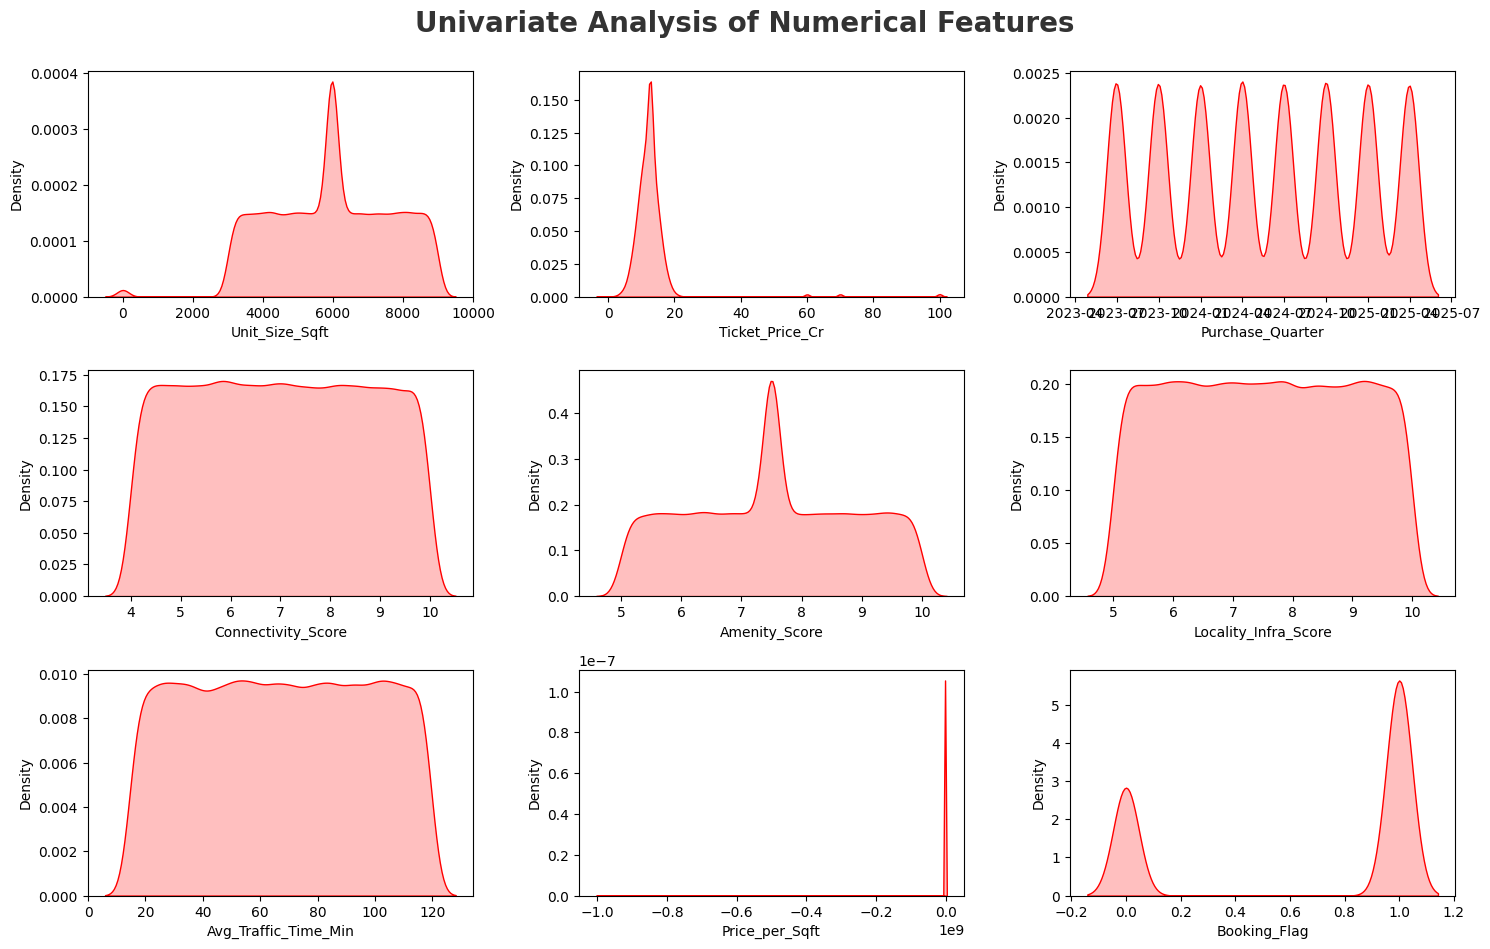

In [108]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=housing_data_df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Observations 

🔹 1. Unit_Size_Sqft

Distribution appears roughly normal but slightly right-skewed.

Most properties are around 5,000–7,000 sqft, with few very small or very large units.

🔹 2. Ticket_Price_Cr

Strong right-skewed distribution.

Majority of ticket prices are below 20 Cr, with a few extreme high-end outliers (~100 Cr).

Indicates significant price disparity across the dataset.

🔹 3. Purchase_Quarter

The density plot shows distinct peaks at regular intervals, suggesting quarterly or seasonal purchase patterns.

There’s likely consistent sales activity every few months.

🔹 4. Connectivity_Score

Nearly uniform distribution between 4 and 10, meaning the dataset includes properties with all levels of connectivity.

No major bias toward high or low scores.

🔹 5. Amenity_Score

Shows a slight peak near 7–8, suggesting that most properties have above-average amenities.

Still somewhat uniform across the full range (5–10).

🔹 6. Locality_Infra_Score

Almost uniform between 5 and 10.

Indicates dataset covers a balanced range of locality infrastructure quality.

🔹 7. Avg_Traffic_Time_Min

Roughly uniform between 20 and 120 minutes, implying diverse commuting conditions across localities.

🔹 8. Price_per_Sqft

Distribution looks heavily compressed near zero with some extreme outliers (possibly negative or erroneous values).

Needs data quality checks—negative prices or excessively large magnitudes indicate data errors or incorrect scaling.

🔹 9. Booking_Flag

Bimodal distribution (peaks around 0 and 1).

This is expected for a binary categorical variable, representing booked vs not booked properties.

The higher peak near 1 suggests more bookings (positive class imbalance).

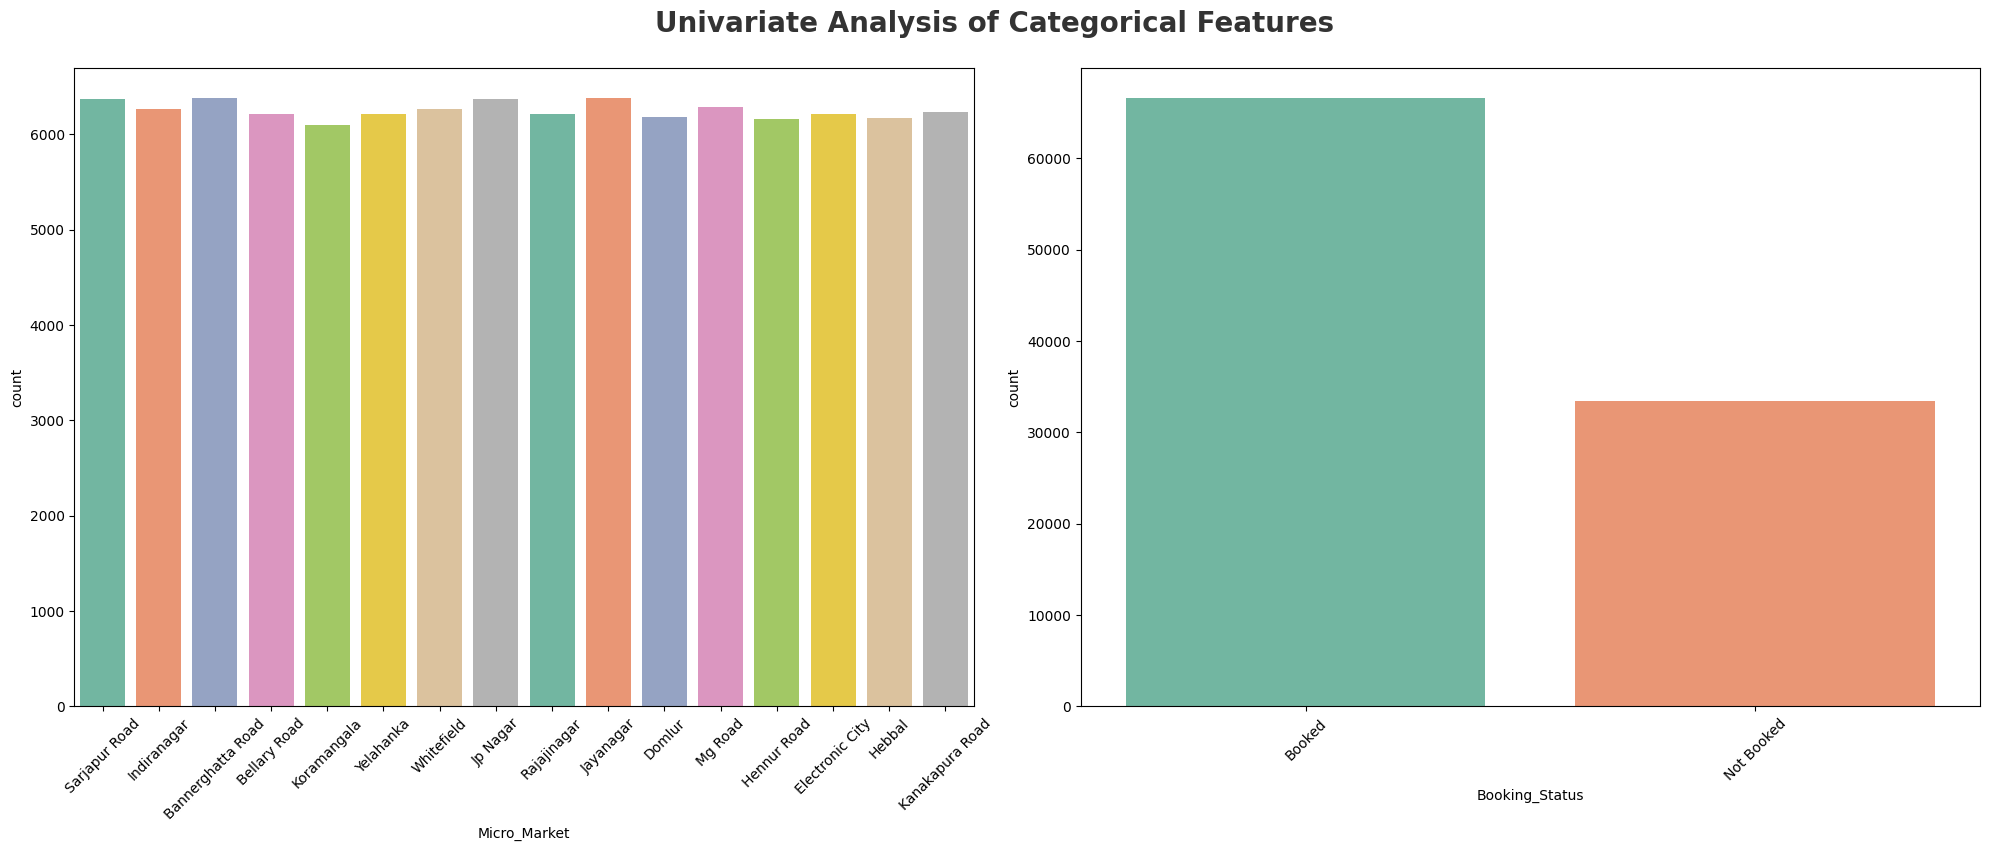

In [109]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Micro_Market', 'Booking_Status']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=housing_data_df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Univariate Analysis of Categorical Features

🔹 1. Micro_Market

There are around 15 micro-markets (e.g., Sarjapur Road, Indiranagar, Bannerghatta Road, etc.).

The count of properties across these markets is fairly uniform, with only minor differences.

This suggests that the dataset is balanced across different locations, avoiding location bias.

A balanced distribution like this helps ensure that model training won’t overfit to a single micro-market.

🔹 2. Booking_Status

Two categories: “Booked” and “Not Booked.”

The Booked category has roughly twice as many entries as Not Booked.

Indicates a moderate class imbalance — the majority of properties are booked.

This imbalance should be handled during modeling (e.g., via class weighting, resampling, or SMOTE) to prevent bias toward the “Booked” class.

## Which is the most popular Configuration category?

<Axes: ylabel='count'>

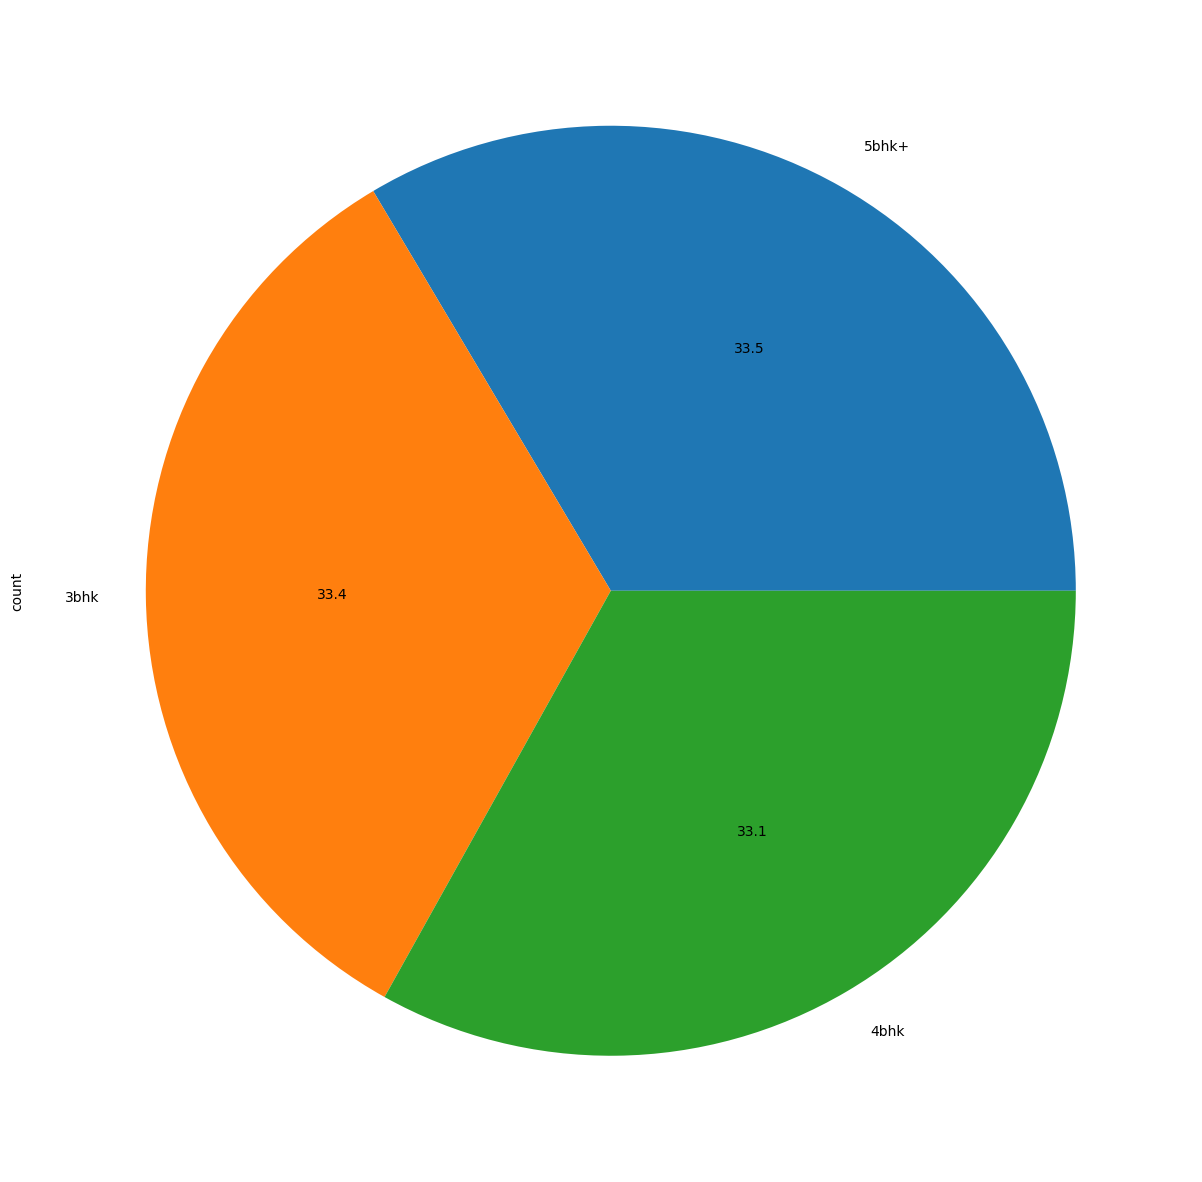

In [110]:
housing_data_df['Configuration'].value_counts().plot.pie(y=housing_data_df['Configuration'],figsize=(15,16),autopct='%1.1f')

## Observations

This pie chart shows the distribution of three different housing categories based on count:

3bhk: 33.4%

4bhk: 33.1%

5bhk+: 33.5%

Observations:

The distribution across the three categories is nearly equal, with each type making up approximately one-third of the total.

5bhk+ has a slightly higher percentage compared to the others, but the difference is minimal.

This could indicate that the dataset is evenly balanced in terms of housing types, or it may have been designed this way for comparison purposes.

In [111]:
#Detect outliers programmatically (IQR method)
def find_outliers(df):
    outliers_dict = {}
    outliers_count={}

    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outliers_dict[col] = outliers.values
        outliers_count[col] = len(outliers)
    
    
    return outliers_dict,outliers_count

outliers,outliersCount= find_outliers(housing_data_df)
print("Outliers for each column:\n", outliers)
print("Outliers count for each column:\n", outliersCount)

Outliers for each column:
 {'Unit_Size_Sqft': array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -

In [112]:
housing_data_df["Unit_Size_Sqft"]=housing_data_df["Unit_Size_Sqft"].abs()

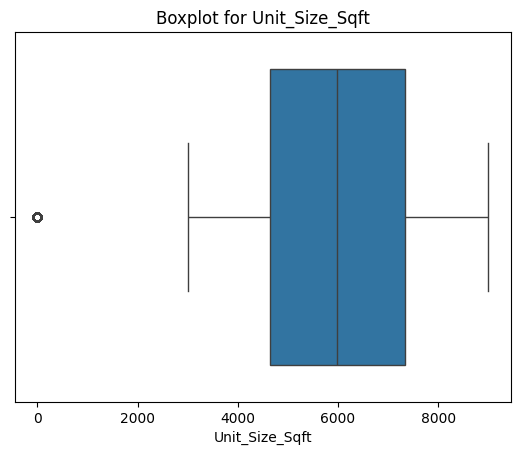

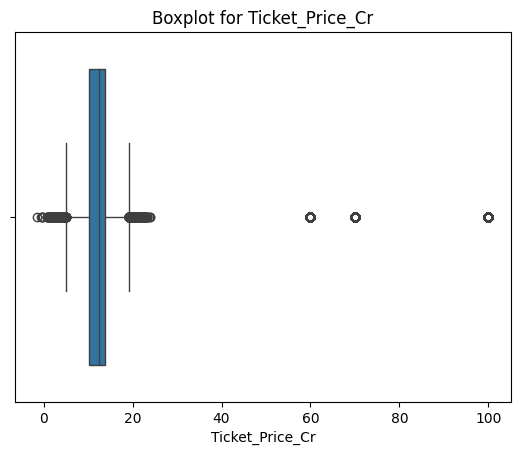

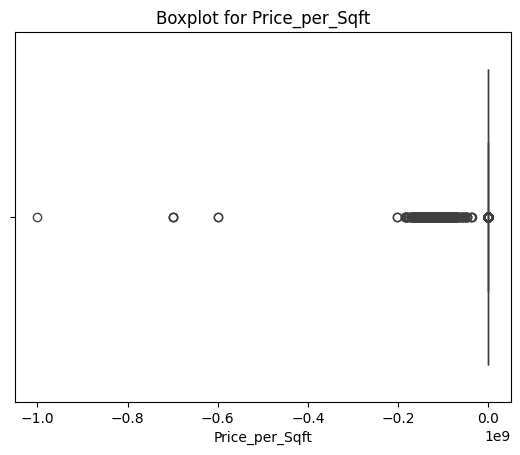

In [113]:


for col in ['Unit_Size_Sqft', 'Ticket_Price_Cr', 'Price_per_Sqft']:
    sns.boxplot(x=housing_data_df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

✅ Outliers after capping:
 ({'Unit_Size_Sqft': array([], dtype=float64), 'Ticket_Price_Cr': array([], dtype=float64), 'Connectivity_Score': array([], dtype=float64), 'Amenity_Score': array([], dtype=float64), 'Locality_Infra_Score': array([], dtype=float64), 'Avg_Traffic_Time_Min': array([], dtype=int64), 'Price_per_Sqft': array([], dtype=float64), 'Booking_Flag': array([], dtype=int64)}, {'Unit_Size_Sqft': 0, 'Ticket_Price_Cr': 0, 'Connectivity_Score': 0, 'Amenity_Score': 0, 'Locality_Infra_Score': 0, 'Avg_Traffic_Time_Min': 0, 'Price_per_Sqft': 0, 'Booking_Flag': 0})


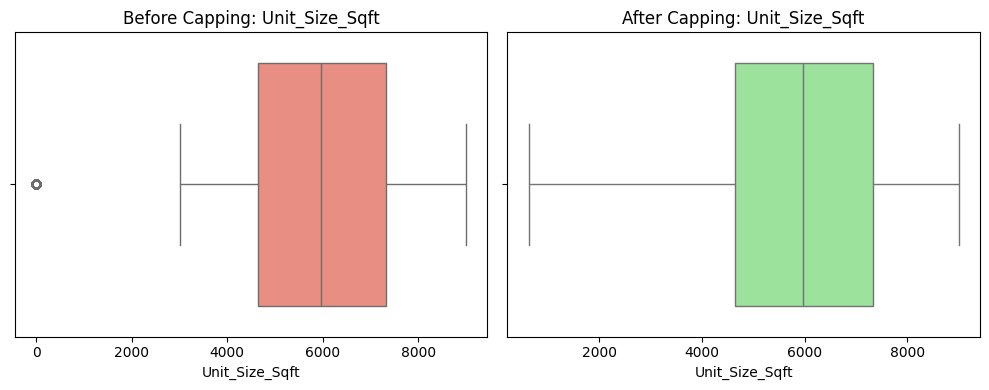

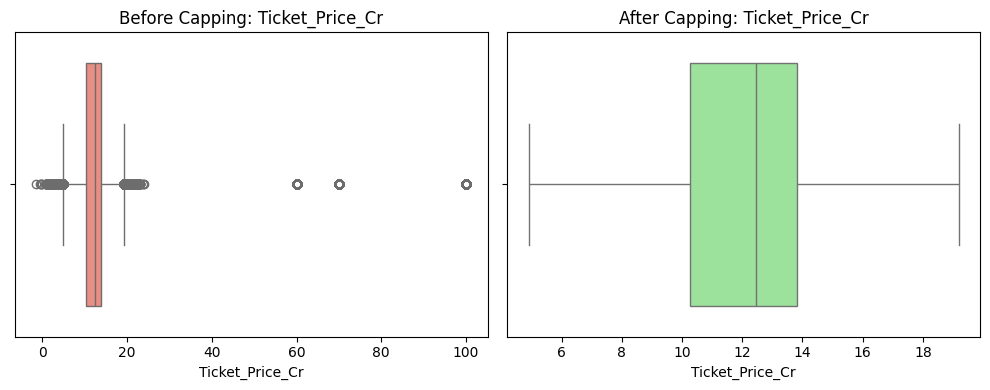

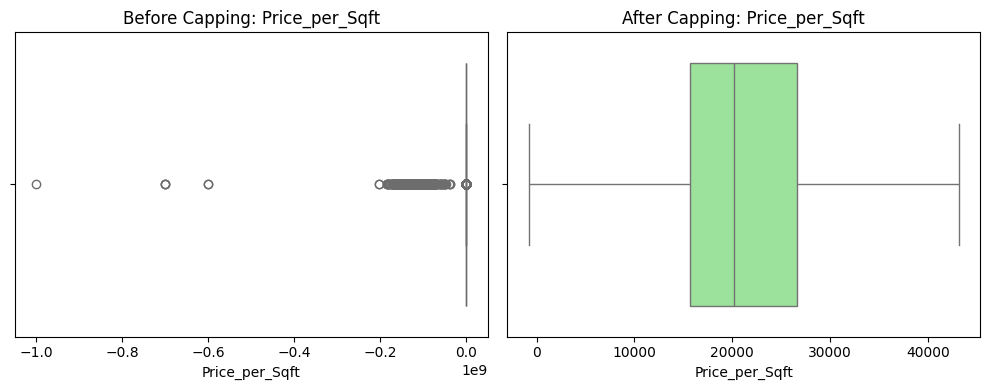

In [114]:
# Handling Outliers 

def cap_outliers_iqr(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap values outside bounds
        df_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped


housing_data_df_clean =housing_data_df.copy()
cols = ['Unit_Size_Sqft', 'Ticket_Price_Cr', 'Price_per_Sqft']
housing_data_df_clean = cap_outliers_iqr(housing_data_df, cols)

#  Recalculate outliers (AFTER capping)
outliers_count_after = find_outliers(housing_data_df_clean)

print("✅ Outliers after capping:\n", outliers_count_after)


# Verify by Boxplot
for col in cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=housing_data_df[col], color='salmon')
    plt.title(f"Before Capping: {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=housing_data_df_clean[col], color='lightgreen')
    plt.title(f"After Capping: {col}")
    plt.tight_layout()
    plt.show()

In [115]:
#Assign only capped columns back to the original DataFrame
housing_data_df[cols] = housing_data_df_clean[cols]

print("Assigned only capped columns back to the original DataFrame")

Assigned only capped columns back to the original DataFrame


In [116]:
housing_data_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Unit_Size_Sqft,100000.0,5975.16767,624.5,4649.0,5972.04017,7332.0,8999.0,1681.622604
Ticket_Price_Cr,100000.0,12.1399,4.912452,10.264426,12.458673,13.832409,19.184384,2.872768
Purchase_Quarter,100000,2024-05-15 06:37:03.072000,2023-06-30 00:00:00,2023-09-30 00:00:00,2024-03-31 00:00:00,2024-09-30 00:00:00,2025-03-31 00:00:00,NaN
Connectivity_Score,100000.0,6.993001,4.000031,5.495535,6.986316,8.490617,9.99997,1.731699
Amenity_Score,100000.0,7.503743,5.000224,6.395876,7.499766,8.615671,9.999865,1.366641
Locality_Infra_Score,100000.0,7.499378,5.000013,6.249147,7.497347,8.751793,9.999956,1.443286
Avg_Traffic_Time_Min,100000.0,67.18802,15.0,41.0,67.0,93.0,119.0,30.267763
Price_per_Sqft,100000.0,21867.984195,-786.349481,15681.526708,20191.526746,26660.110835,43127.987024,8679.992025
Booking_Flag,100000.0,0.6659,0.0,0.0,1.0,1.0,1.0,0.471677


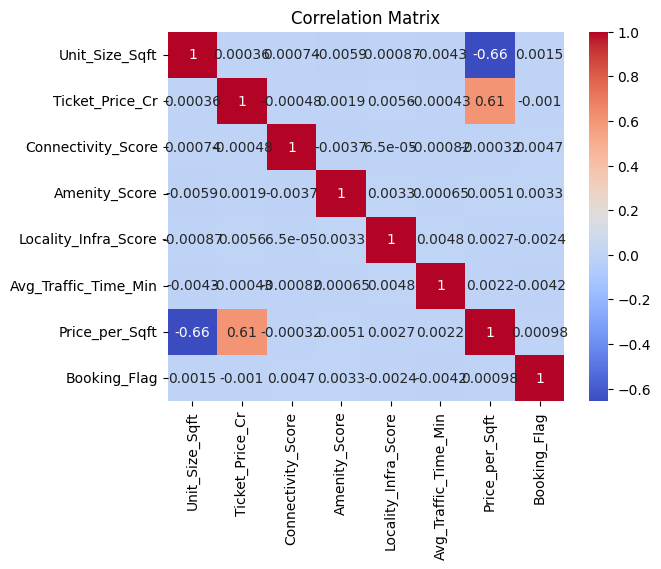

In [117]:
# Correlation matrix
corr_matrix = housing_data_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



## Correlation Matrix Observations

🔹 1. Strong Correlations

Ticket_Price_Cr ↔ Price_per_Sqft (r = +0.61)

A moderately strong positive correlation, indicating that as the total ticket price increases, the price per square foot also tends to increase.

This is a logical relationship — higher-priced properties generally have higher price per area.

Unit_Size_Sqft ↔ Price_per_Sqft (r = –0.66)

A moderately strong negative correlation, meaning larger units tend to have lower price per square foot.

This aligns with real estate trends where larger homes often have lower per-square-foot costs due to bulk pricing.

🔹 2. Weak or No Correlations

Most other variables such as Connectivity_Score, Amenity_Score, Locality_Infra_Score, and Avg_Traffic_Time_Min show near-zero correlations with each other and with price or booking variables.

This implies that these features are largely independent and may provide unique, non-redundant information to predictive models.

🔹 3. Booking_Flag Correlations

Booking_Flag shows very weak correlations (close to 0) with all other variables.

Indicates that no single numeric variable alone strongly drives booking decisions — likely, booking behavior is influenced by a combination of factors or categorical variables (like location).

## Load Clean Data into new cleaned CSV

In [118]:
housing_data_df.to_csv('F:/Python_WC/Luxury Housing Sales Analysis – Bengaluru/Luxury_Housing_Bangalore/Luxury_Housing_Bangalore_Cleaned.csv', index=False)

## Load Clean Data into MySql

In [119]:
# Database connection details
username = "root"          # your MySQL username
password = urllib.parse.quote_plus("Password@0274")  # encode special characters  # your MySQL password
host = "localhost"         # local system
port = 3306                # default MySQL port
database = "Luxury_Housing_Bangalore_DB"        # your database name

#Connect to MySQL *without specifying the database*
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}")

# Create the database if it doesn't exist
with engine.connect() as conn:
    conn.execute(text(f"CREATE DATABASE IF NOT EXISTS {database}"))
    print(f"✅ Database '{database}' created or already exists.")

# Now connect to that database
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")




✅ Database 'Luxury_Housing_Bangalore_DB' created or already exists.


In [120]:
# Insert DataFrame into MySQL 
housing_data_df.to_sql('luxury_properties', con=engine, if_exists='replace', index=False)    ## use 'replace' to overwrite or 'append' to add data

print("Table created and data inserted successfully!")


Table created and data inserted successfully!
